In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
processed_df = pd.read_csv('admissions_processed.csv')

In [4]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [5]:
print("="*80)
print("📊 ADMISSIONS DATA ANALYSIS - INITIAL OVERVIEW")
print("="*80)

# Basic statistics
print(f"\n1. Dataset Size:")
print(f"   • Total Applications: {len(processed_df):,}")
print(f"   • Total Features: {processed_df.shape[1]}")

# Check if we have admission results column
if 'admission_result' in processed_df.columns or 'application_status' in processed_df.columns:
    result_col = 'admission_result' if 'admission_result' in processed_df.columns else 'application_status'
    print(f"\n2. Admission Results Distribution:")
    print(processed_df[result_col].value_counts())
    print(f"\n   Percentages:")
    print(processed_df[result_col].value_counts(normalize=True) * 100)
else:
    result_col = None
    print("\n⚠️  No admission result column found. Analysis will focus on applicant profiles.")

print("\n" + "="*80)

📊 ADMISSIONS DATA ANALYSIS - INITIAL OVERVIEW

1. Dataset Size:
   • Total Applications: 250,795
   • Total Features: 93

2. Admission Results Distribution:
admission_result
1    164939
0     85856
Name: count, dtype: int64

   Percentages:
admission_result
1    65.766463
0    34.233537
Name: proportion, dtype: float64



📚 INSIGHT 1: ACADEMIC PERFORMANCE DISTRIBUTION


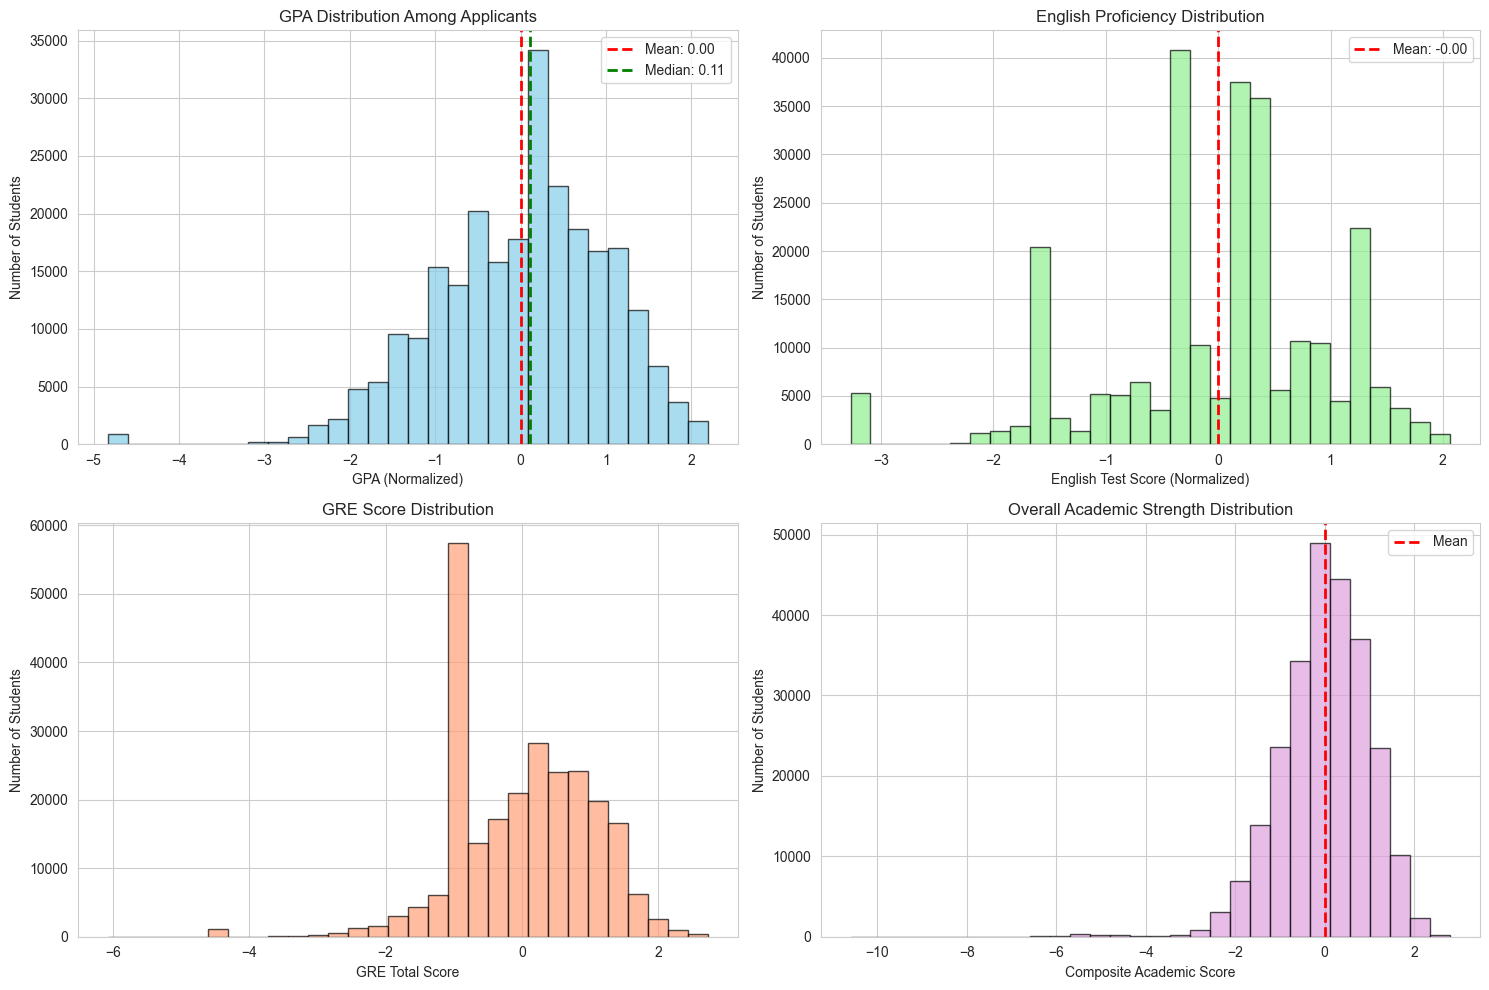


📊 Academic Performance Statistics:

GPA Statistics:
   • Mean GPA: 0.00
   • Median GPA: 0.11
   • 75th Percentile: 0.74
   • 25th Percentile: -0.66

English Test Statistics:
   • Mean Score: -0.00
   • Median Score: 0.14



In [6]:
# Cell 2: Academic Performance Analysis

print("="*80)
print("📚 INSIGHT 1: ACADEMIC PERFORMANCE DISTRIBUTION")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. GPA Distribution
if 'gpa_normalized' in processed_df.columns:
    axes[0, 0].hist(processed_df['gpa_normalized'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(processed_df['gpa_normalized'].mean(), color='red', 
                       linestyle='--', linewidth=2, label=f'Mean: {processed_df["gpa_normalized"].mean():.2f}')
    axes[0, 0].axvline(processed_df['gpa_normalized'].median(), color='green', 
                       linestyle='--', linewidth=2, label=f'Median: {processed_df["gpa_normalized"].median():.2f}')
    axes[0, 0].set_xlabel('GPA (Normalized)')
    axes[0, 0].set_ylabel('Number of Students')
    axes[0, 0].set_title('GPA Distribution Among Applicants')
    axes[0, 0].legend()

# 2. English Test Scores
if 'english_test_normalized' in processed_df.columns:
    axes[0, 1].hist(processed_df['english_test_normalized'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[0, 1].axvline(processed_df['english_test_normalized'].mean(), color='red', 
                       linestyle='--', linewidth=2, label=f'Mean: {processed_df["english_test_normalized"].mean():.2f}')
    axes[0, 1].set_xlabel('English Test Score (Normalized)')
    axes[0, 1].set_ylabel('Number of Students')
    axes[0, 1].set_title('English Proficiency Distribution')
    axes[0, 1].legend()

# 3. GRE Scores (if available)
if 'gre_total' in processed_df.columns:
    # Remove normalized values for better interpretation
    gre_original = processed_df['gre_total'] * processed_df['gre_total'].std() + processed_df['gre_total'].mean()
    axes[1, 0].hist(gre_original, bins=30, color='lightsalmon', edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('GRE Total Score')
    axes[1, 0].set_ylabel('Number of Students')
    axes[1, 0].set_title('GRE Score Distribution')

# 4. Composite Academic Score
if 'composite_academic_score' in processed_df.columns:
    axes[1, 1].hist(processed_df['composite_academic_score'], bins=30, color='plum', edgecolor='black', alpha=0.7)
    axes[1, 1].axvline(processed_df['composite_academic_score'].mean(), color='red', 
                       linestyle='--', linewidth=2, label='Mean')
    axes[1, 1].set_xlabel('Composite Academic Score')
    axes[1, 1].set_ylabel('Number of Students')
    axes[1, 1].set_title('Overall Academic Strength Distribution')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Statistical Summary
print("\n📊 Academic Performance Statistics:")
print("\nGPA Statistics:")
if 'gpa_normalized' in processed_df.columns:
    print(f"   • Mean GPA: {processed_df['gpa_normalized'].mean():.2f}")
    print(f"   • Median GPA: {processed_df['gpa_normalized'].median():.2f}")
    print(f"   • 75th Percentile: {processed_df['gpa_normalized'].quantile(0.75):.2f}")
    print(f"   • 25th Percentile: {processed_df['gpa_normalized'].quantile(0.25):.2f}")

print("\nEnglish Test Statistics:")
if 'english_test_normalized' in processed_df.columns:
    print(f"   • Mean Score: {processed_df['english_test_normalized'].mean():.2f}")
    print(f"   • Median Score: {processed_df['english_test_normalized'].median():.2f}")

print("\n" + "="*80)

📊 INSIGHT 2: GPA CATEGORY BREAKDOWN


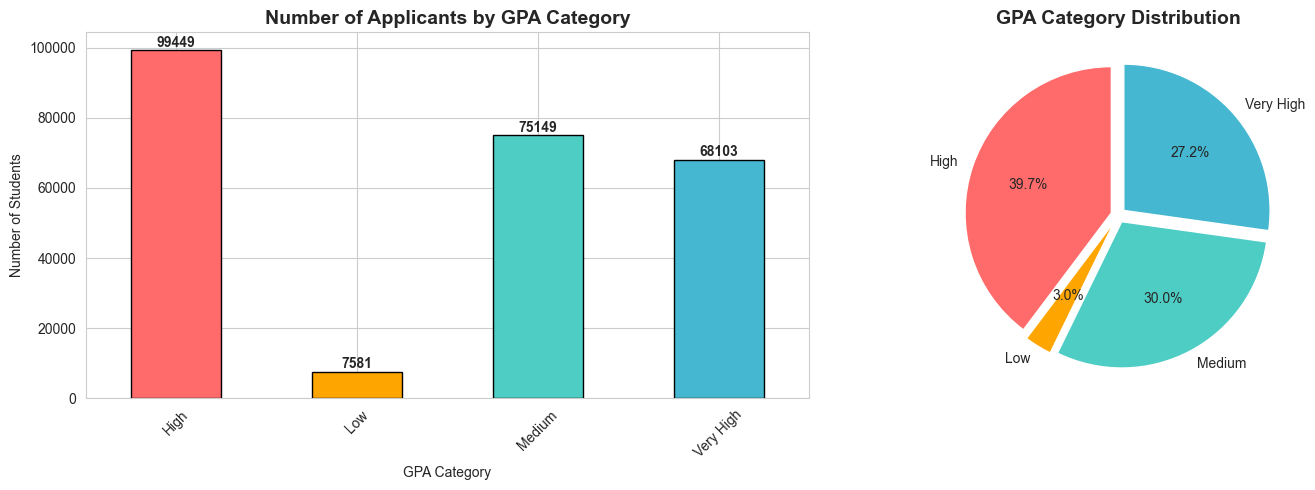


📈 GPA Category Breakdown:

Category        Count      Percentage  
----------------------------------------
High            99449       39.65%
Low             7581         3.02%
Medium          75149       29.96%
Very High       68103       27.15%

💡 Key Insights:
   • Most common GPA category: High (99,449 students)
   • High/Very High GPA students: 167,552 (66.8%)



In [7]:
# Cell 3: GPA Category Deep Dive

print("="*80)
print("📊 INSIGHT 2: GPA CATEGORY BREAKDOWN")
print("="*80)

if 'gpa_category' in processed_df.columns:
    
    # Count by category
    gpa_counts = processed_df['gpa_category'].value_counts().sort_index()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar chart
    gpa_counts.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#FFA500', '#4ECDC4', '#45B7D1'], 
                    edgecolor='black')
    axes[0].set_title('Number of Applicants by GPA Category', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('GPA Category')
    axes[0].set_ylabel('Number of Students')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    
    # Add count labels on bars
    for i, v in enumerate(gpa_counts):
        axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    axes[1].pie(gpa_counts, labels=gpa_counts.index, autopct='%1.1f%%', 
                colors=['#FF6B6B', '#FFA500', '#4ECDC4', '#45B7D1'],
                startangle=90, explode=[0.05] * len(gpa_counts))
    axes[1].set_title('GPA Category Distribution', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Detailed breakdown
    print("\n📈 GPA Category Breakdown:")
    print(f"\n{'Category':<15} {'Count':<10} {'Percentage':<12}")
    print("-" * 40)
    for category, count in gpa_counts.items():
        percentage = (count / len(processed_df)) * 100
        print(f"{category:<15} {count:<10} {percentage:>6.2f}%")
    
    # Key insights
    print("\n💡 Key Insights:")
    most_common = gpa_counts.idxmax()
    print(f"   • Most common GPA category: {most_common} ({gpa_counts.max():,} students)")
    print(f"   • High/Very High GPA students: {(gpa_counts.get('High', 0) + gpa_counts.get('Very High', 0)):,} " +
          f"({((gpa_counts.get('High', 0) + gpa_counts.get('Very High', 0)) / len(processed_df) * 100):.1f}%)")
    
else:
    print("⚠️  GPA category column not found")

print("\n" + "="*80)

💼 INSIGHT 3: PROFESSIONAL EXPERIENCE ANALYSIS


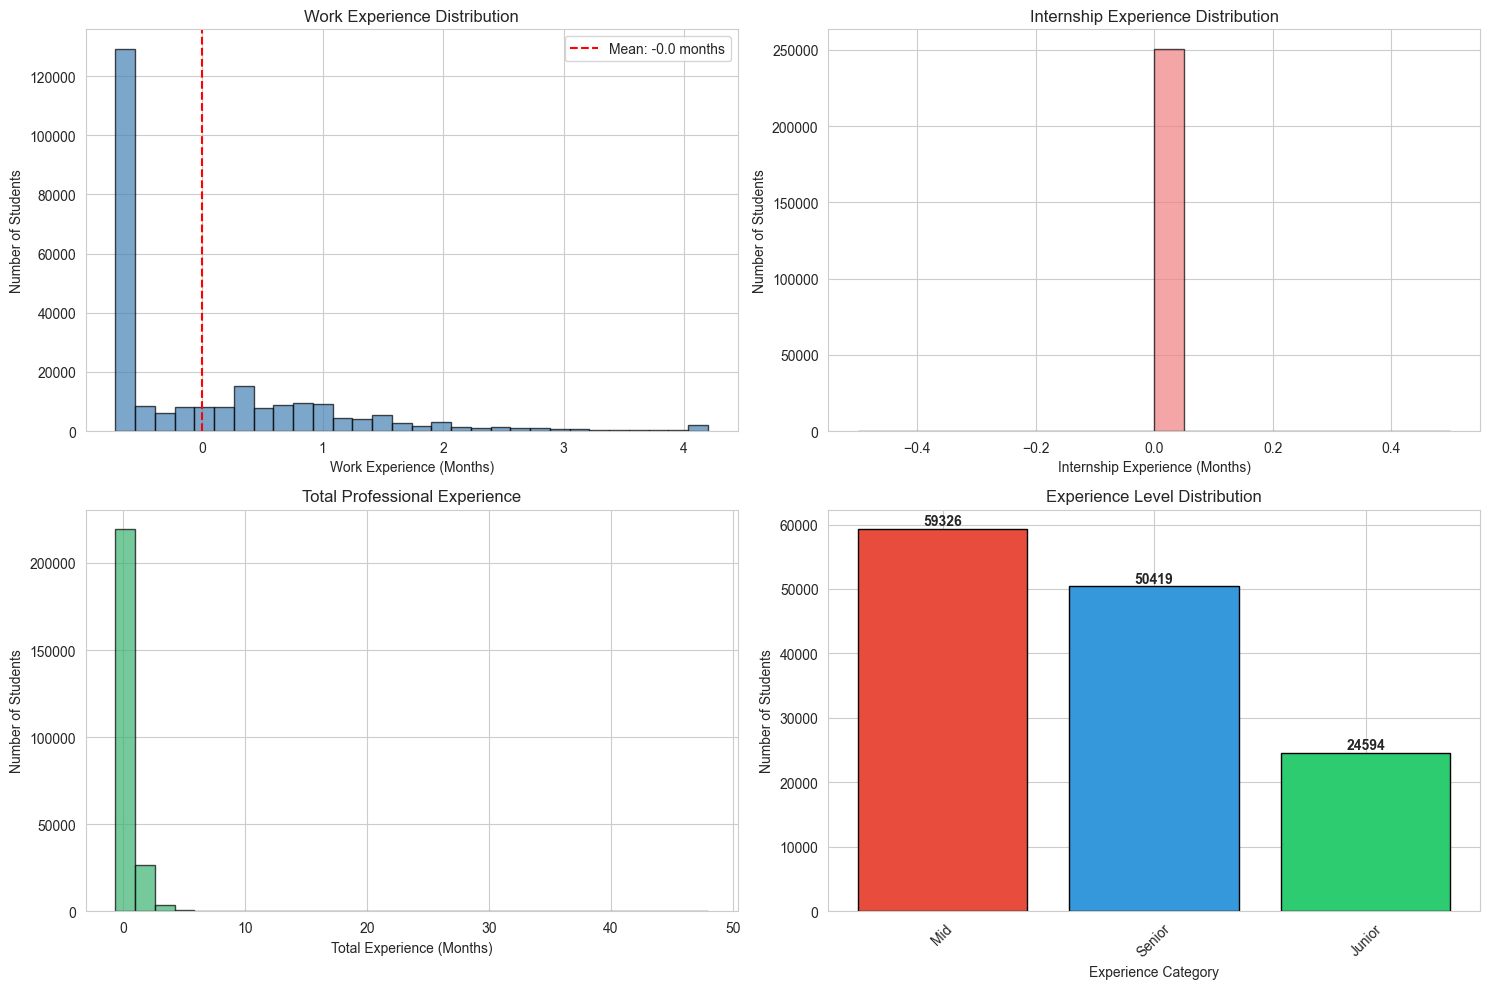


📊 Experience Statistics:

Work Experience:
   • Average: -0.0 months (-0.0 years)
   • Median: -0.6 months
   • Students with 0 experience: 0 (0.0%)
   • Students with 2+ years exp: 0 (0.0%)

Experience Category Breakdown:
   • Mid: 59,326 (23.7%)
   • Senior: 50,419 (20.1%)
   • Junior: 24,594 (9.8%)

Research Publications:
   • Students with publications: 0 (0.0%)
   • Average publications (for those who have): nan

💡 Key Insight:
   Experience levels vary widely - from fresh graduates to seasoned professionals.
   This diversity suggests programs accept various experience profiles.



In [8]:
# Cell 4: Work Experience & Internship Analysis

print("="*80)
print("💼 INSIGHT 3: PROFESSIONAL EXPERIENCE ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Work Experience Distribution
if 'work_experience' in processed_df.columns:
    # Denormalize for interpretation
    work_exp_original = processed_df['work_experience'] * processed_df['work_experience'].std() + processed_df['work_experience'].mean()
    axes[0, 0].hist(work_exp_original[work_exp_original <= 60], bins=30, 
                    color='steelblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Work Experience (Months)')
    axes[0, 0].set_ylabel('Number of Students')
    axes[0, 0].set_title('Work Experience Distribution')
    axes[0, 0].axvline(work_exp_original.mean(), color='red', linestyle='--', 
                       label=f'Mean: {work_exp_original.mean():.1f} months')
    axes[0, 0].legend()

# 2. Internship Experience
if 'internship_experience' in processed_df.columns:
    intern_exp_original = processed_df['internship_experience'] * processed_df['internship_experience'].std() + processed_df['internship_experience'].mean()
    axes[0, 1].hist(intern_exp_original[intern_exp_original <= 24], bins=20, 
                    color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel('Internship Experience (Months)')
    axes[0, 1].set_ylabel('Number of Students')
    axes[0, 1].set_title('Internship Experience Distribution')

# 3. Total Experience Distribution
if 'total_experience' in processed_df.columns:
    total_exp_original = processed_df['total_experience'] * processed_df['total_experience'].std() + processed_df['total_experience'].mean()
    axes[1, 0].hist(total_exp_original[total_exp_original <= 72], bins=30, 
                    color='mediumseagreen', edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Total Experience (Months)')
    axes[1, 0].set_ylabel('Number of Students')
    axes[1, 0].set_title('Total Professional Experience')

# 4. Experience Category Breakdown
if 'experience_category' in processed_df.columns:
    exp_cat_counts = processed_df['experience_category'].value_counts()
    axes[1, 1].bar(range(len(exp_cat_counts)), exp_cat_counts.values, 
                   color=['#E74C3C', '#3498DB', '#2ECC71', '#F39C12'], edgecolor='black')
    axes[1, 1].set_xticks(range(len(exp_cat_counts)))
    axes[1, 1].set_xticklabels(exp_cat_counts.index, rotation=45)
    axes[1, 1].set_xlabel('Experience Category')
    axes[1, 1].set_ylabel('Number of Students')
    axes[1, 1].set_title('Experience Level Distribution')
    
    # Add count labels
    for i, v in enumerate(exp_cat_counts.values):
        axes[1, 1].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical Summary
print("\n📊 Experience Statistics:")

if 'work_experience' in processed_df.columns:
    work_exp_stats = work_exp_original.describe()
    print("\nWork Experience:")
    print(f"   • Average: {work_exp_stats['mean']:.1f} months ({work_exp_stats['mean']/12:.1f} years)")
    print(f"   • Median: {work_exp_stats['50%']:.1f} months")
    print(f"   • Students with 0 experience: {(work_exp_original == 0).sum():,} ({(work_exp_original == 0).sum()/len(processed_df)*100:.1f}%)")
    print(f"   • Students with 2+ years exp: {(work_exp_original >= 24).sum():,} ({(work_exp_original >= 24).sum()/len(processed_df)*100:.1f}%)")

if 'experience_category' in processed_df.columns:
    print("\nExperience Category Breakdown:")
    for cat, count in processed_df['experience_category'].value_counts().items():
        print(f"   • {cat}: {count:,} ({count/len(processed_df)*100:.1f}%)")

# Publications analysis
if 'publications' in processed_df.columns:
    pub_original = processed_df['publications'] * processed_df['publications'].std() + processed_df['publications'].mean()
    has_pubs = (pub_original > 0).sum()
    print(f"\nResearch Publications:")
    print(f"   • Students with publications: {has_pubs:,} ({has_pubs/len(processed_df)*100:.1f}%)")
    print(f"   • Average publications (for those who have): {pub_original[pub_original > 0].mean():.1f}")

print("\n💡 Key Insight:")
print("   Experience levels vary widely - from fresh graduates to seasoned professionals.")
print("   This diversity suggests programs accept various experience profiles.")

print("\n" + "="*80)

🔗 INSIGHT 4: ACADEMIC PERFORMANCE VS EXPERIENCE


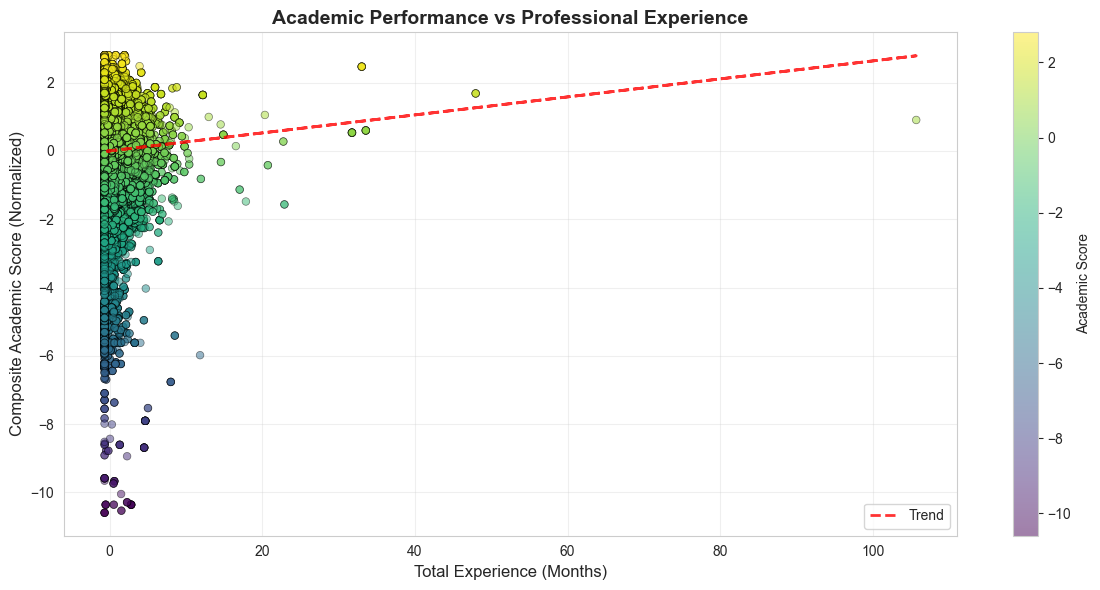


📊 Correlation Analysis:
   • Correlation coefficient: 0.026
   • Interpretation: WEAK correlation - Academic scores and experience are largely independent
   • Meaning: Strong academics can compensate for less experience and vice versa

📈 Segmented Analysis:
   • Strong academics, limited experience: 0 students
   • Moderate academics, strong experience: 14,420 students
   • Both strong: 17,080 students

💡 Key Insight:
   Students can take multiple paths to admission:
   - Excel academically with less experience (fresh graduates)
   - Build experience to compensate for moderate academics (working professionals)



In [9]:
# Cell 5: Relationship Between Academics and Experience

print("="*80)
print("🔗 INSIGHT 4: ACADEMIC PERFORMANCE VS EXPERIENCE")
print("="*80)

if 'composite_academic_score' in processed_df.columns and 'total_experience' in processed_df.columns:
    
    # Denormalize for better interpretation
    comp_score = processed_df['composite_academic_score']
    total_exp = processed_df['total_experience'] * processed_df['total_experience'].std() + processed_df['total_experience'].mean()
    
    # Create the scatter plot
    plt.figure(figsize=(12, 6))
    
    scatter = plt.scatter(total_exp, comp_score, 
                         alpha=0.5, c=comp_score, cmap='viridis', 
                         s=30, edgecolors='black', linewidth=0.5)
    
    plt.colorbar(scatter, label='Academic Score')
    plt.xlabel('Total Experience (Months)', fontsize=12)
    plt.ylabel('Composite Academic Score (Normalized)', fontsize=12)
    plt.title('Academic Performance vs Professional Experience', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(total_exp, comp_score, 1)
    p = np.poly1d(z)
    plt.plot(total_exp, p(total_exp), "r--", alpha=0.8, linewidth=2, label='Trend')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    correlation = processed_df['composite_academic_score'].corr(processed_df['total_experience'])
    
    print("\n📊 Correlation Analysis:")
    print(f"   • Correlation coefficient: {correlation:.3f}")
    
    if abs(correlation) < 0.3:
        print("   • Interpretation: WEAK correlation - Academic scores and experience are largely independent")
        print("   • Meaning: Strong academics can compensate for less experience and vice versa")
    elif abs(correlation) < 0.7:
        print("   • Interpretation: MODERATE correlation")
    else:
        print("   • Interpretation: STRONG correlation")
    
    # Segment analysis
    print("\n📈 Segmented Analysis:")
    
    # High academics, low experience
    high_acad_low_exp = ((comp_score > comp_score.quantile(0.75)) & 
                         (total_exp < total_exp.quantile(0.25))).sum()
    
    # Low academics, high experience
    low_acad_high_exp = ((comp_score < comp_score.quantile(0.25)) & 
                         (total_exp > total_exp.quantile(0.75))).sum()
    
    # Both high
    both_high = ((comp_score > comp_score.quantile(0.75)) & 
                 (total_exp > total_exp.quantile(0.75))).sum()
    
    print(f"   • Strong academics, limited experience: {high_acad_low_exp:,} students")
    print(f"   • Moderate academics, strong experience: {low_acad_high_exp:,} students")
    print(f"   • Both strong: {both_high:,} students")
    
    print("\n💡 Key Insight:")
    if abs(correlation) < 0.3:
        print("   Students can take multiple paths to admission:")
        print("   - Excel academically with less experience (fresh graduates)")
        print("   - Build experience to compensate for moderate academics (working professionals)")
    else:
        print("   Top candidates tend to have both strong academics AND experience")

else:
    print("⚠️  Required columns not found for this analysis")

print("\n" + "="*80)

🎓 INSIGHT 5: UNIVERSITY & PROGRAM PREFERENCES

📍 Top 15 Most Applied Universities:


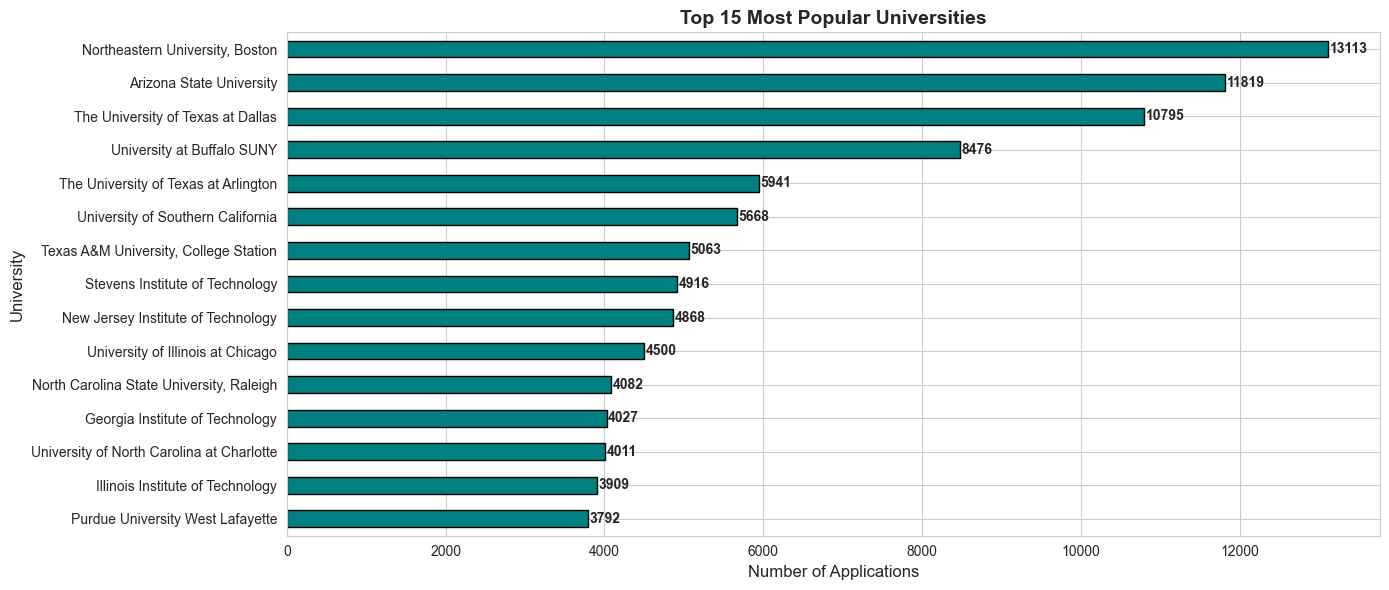


------------------------------------------------------------
 1. Northeastern University, Boston               13,113 applications
 2. Arizona State University                      11,819 applications
 3. The University of Texas at Dallas             10,795 applications
 4. University at Buffalo SUNY                     8,476 applications
 5. The University of Texas at Arlington           5,941 applications
 6. University of Southern California              5,668 applications
 7. Texas A&M University, College Station          5,063 applications
 8. Stevens Institute of Technology                4,916 applications
 9. New Jersey Institute of Technology             4,868 applications
10. University of Illinois at Chicago              4,500 applications
11. North Carolina State University, Raleigh       4,082 applications
12. Georgia Institute of Technology                4,027 applications
13. University of North Carolina at Charlotte      4,011 applications
14. Illinois Institute of Te

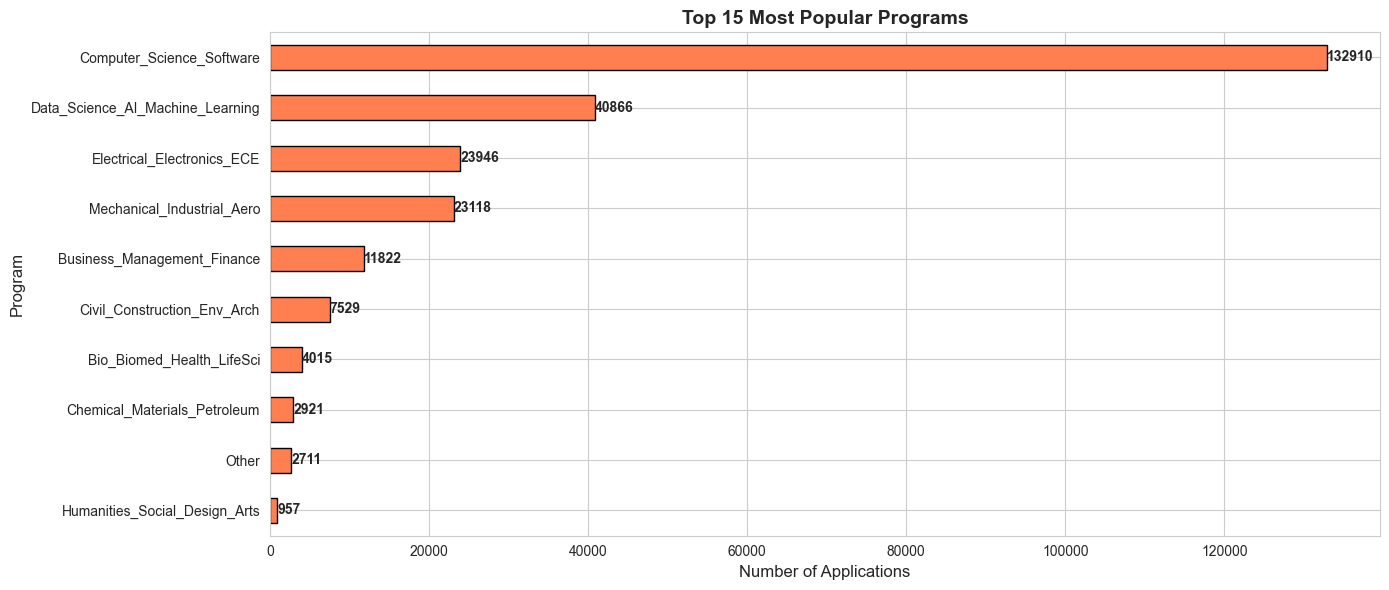


------------------------------------------------------------
 1. Computer_Science_Software                     132,910 applications
 2. Data_Science_AI_Machine_Learning              40,866 applications
 3. Electrical_Electronics_ECE                    23,946 applications
 4. Mechanical_Industrial_Aero                    23,118 applications
 5. Business_Management_Finance                   11,822 applications
 6. Civil_Construction_Env_Arch                    7,529 applications
 7. Bio_Biomed_Health_LifeSci                      4,015 applications
 8. Chemical_Materials_Petroleum                   2,921 applications
 9. Other                                          2,711 applications
10. Humanities_Social_Design_Arts                    957 applications


🏆 University Tier Distribution:


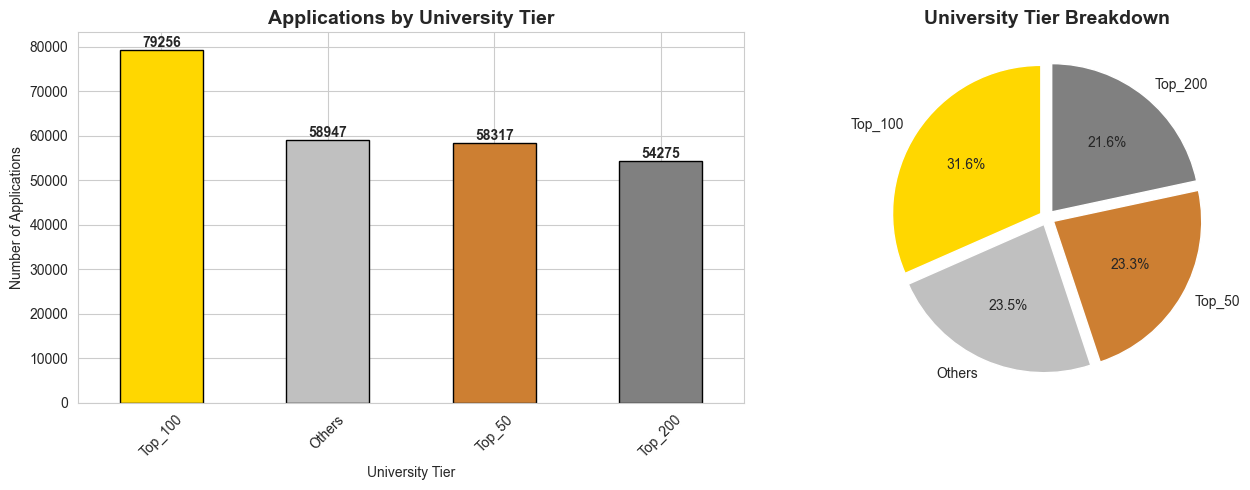


--------------------------------------------------
Top_100         79,256 applications ( 31.6%)
Others          58,947 applications ( 23.5%)
Top_50          58,317 applications ( 23.3%)
Top_200         54,275 applications ( 21.6%)

💡 Key Insight:
   • 23.3% of applications target Top 50 universities
   • Shows aspirational nature of Indian students applying abroad


🎯 Target Degree Distribution:


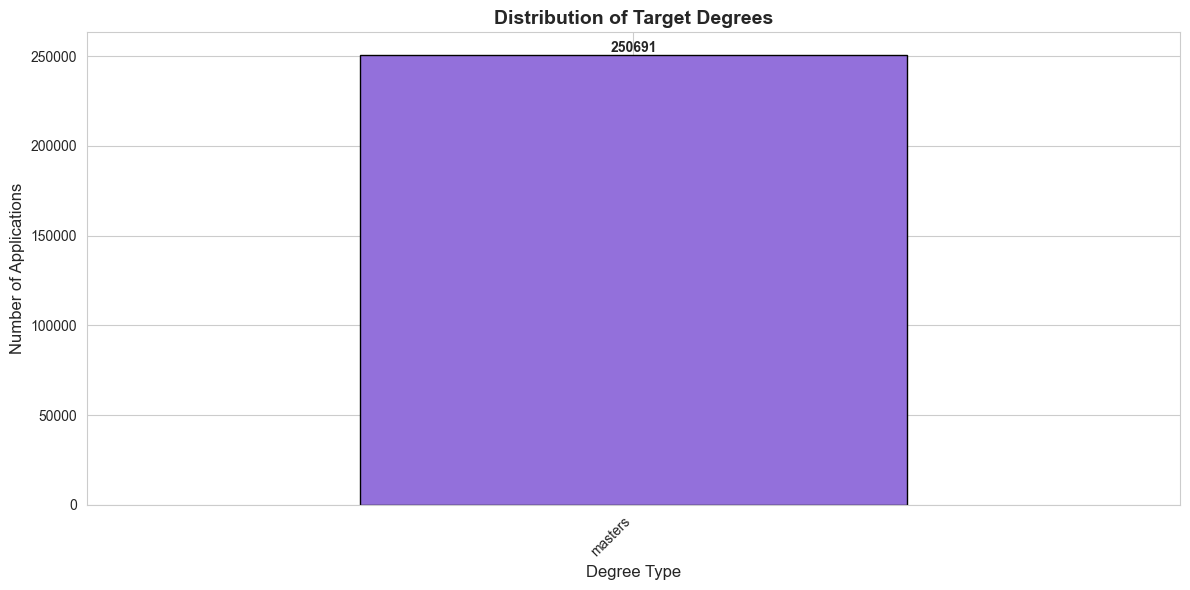

   • masters: 250,691 (100.0%)



In [10]:
# Cell 6: University and Program Analysis

print("="*80)
print("🎓 INSIGHT 5: UNIVERSITY & PROGRAM PREFERENCES")
print("="*80)

# Top Universities
if 'university_name' in processed_df.columns:
    print("\n📍 Top 15 Most Applied Universities:")
    top_unis = processed_df['university_name'].value_counts().head(15)
    
    plt.figure(figsize=(14, 6))
    top_unis.plot(kind='barh', color='teal', edgecolor='black')
    plt.xlabel('Number of Applications', fontsize=12)
    plt.ylabel('University', fontsize=12)
    plt.title('Top 15 Most Popular Universities', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add count labels
    for i, v in enumerate(top_unis.values):
        plt.text(v + 20, i, str(v), va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "-" * 60)
    for i, (uni, count) in enumerate(top_unis.items(), 1):
        print(f"{i:2d}. {uni:<45} {count:>6,} applications")

# Top Programs
if 'course_name' in processed_df.columns or 'categorical_course_name' in processed_df.columns:
    course_col = 'categorical_course_name' if 'categorical_course_name' in processed_df.columns else 'course_name'
    
    print(f"\n\n📚 Top 15 Most Applied Programs:")
    top_programs = processed_df[course_col].value_counts().head(15)
    
    plt.figure(figsize=(14, 6))
    top_programs.plot(kind='barh', color='coral', edgecolor='black')
    plt.xlabel('Number of Applications', fontsize=12)
    plt.ylabel('Program', fontsize=12)
    plt.title('Top 15 Most Popular Programs', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add count labels
    for i, v in enumerate(top_programs.values):
        plt.text(v + 20, i, str(v), va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "-" * 60)
    for i, (program, count) in enumerate(top_programs.items(), 1):
        print(f"{i:2d}. {program:<45} {count:>6,} applications")

# University Tier Analysis
if 'university_tier' in processed_df.columns:
    print("\n\n🏆 University Tier Distribution:")
    tier_counts = processed_df['university_tier'].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    tier_counts.plot(kind='bar', ax=axes[0], color=['#FFD700', '#C0C0C0', '#CD7F32', '#808080'],
                     edgecolor='black')
    axes[0].set_title('Applications by University Tier', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('University Tier')
    axes[0].set_ylabel('Number of Applications')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    
    for i, v in enumerate(tier_counts.values):
        axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    axes[1].pie(tier_counts, labels=tier_counts.index, autopct='%1.1f%%',
                colors=['#FFD700', '#C0C0C0', '#CD7F32', '#808080'],
                startangle=90, explode=[0.05] * len(tier_counts))
    axes[1].set_title('University Tier Breakdown', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "-" * 50)
    for tier, count in tier_counts.items():
        print(f"{tier:<15} {count:>6,} applications ({count/len(processed_df)*100:>5.1f}%)")
    
    print("\n💡 Key Insight:")
    top_tier_pct = (tier_counts.get('Top_50', 0) / len(processed_df)) * 100
    print(f"   • {top_tier_pct:.1f}% of applications target Top 50 universities")
    print("   • Shows aspirational nature of Indian students applying abroad")

# Target Degree Distribution
if 'target_degree' in processed_df.columns:
    print("\n\n🎯 Target Degree Distribution:")
    degree_counts = processed_df['target_degree'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    degree_counts.plot(kind='bar', color='mediumpurple', edgecolor='black')
    plt.xlabel('Degree Type', fontsize=12)
    plt.ylabel('Number of Applications', fontsize=12)
    plt.title('Distribution of Target Degrees', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    
    for i, v in enumerate(degree_counts.values):
        plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    for degree, count in degree_counts.items():
        print(f"   • {degree}: {count:,} ({count/len(processed_df)*100:.1f}%)")

print("\n" + "="*80)

📅 INSIGHT 6: APPLICATION TIMING PATTERNS


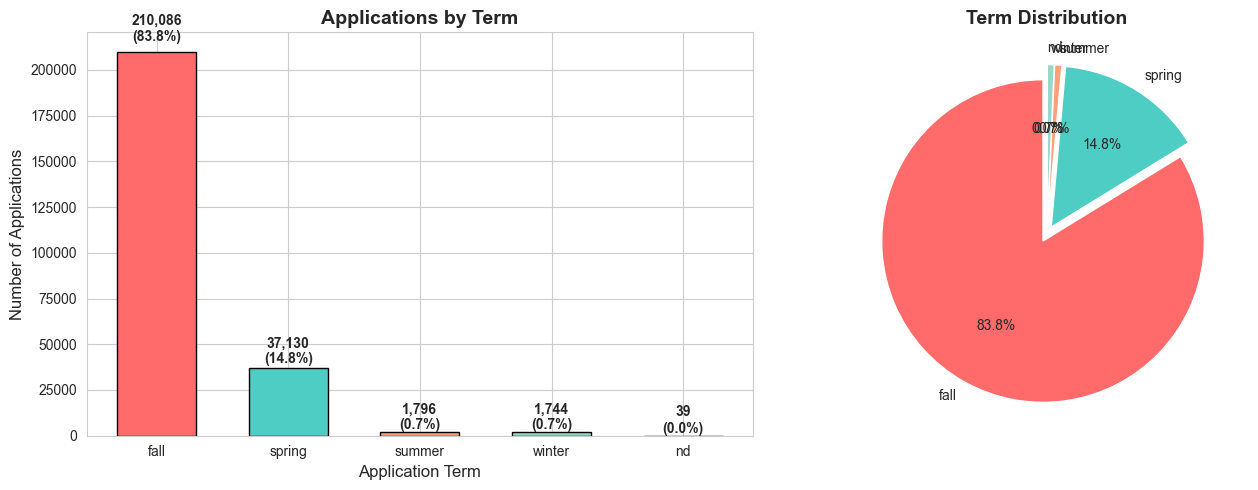


📊 Application Term Breakdown:
--------------------------------------------------
   • FALL       210,086 applications ( 83.8%)
   • SPRING     37,130 applications ( 14.8%)
   • SUMMER      1,796 applications (  0.7%)
   • WINTER      1,744 applications (  0.7%)
   • ND             39 applications (  0.0%)

💡 Key Insight:
   • FALL is the most popular admission term (83.8% of applications)
   • Fall typically has more seats and funding opportunities
   • Spring admits are often for specific programs or waitlist candidates
   • 83.8% of all applications are for Fall term
   • Applications span 5 different terms
   • Diverse application timing suggests flexible admission cycles



In [13]:
# Cell 7: Application Timing and Term Analysis

print("="*80)
print("📅 INSIGHT 6: APPLICATION TIMING PATTERNS")
print("="*80)

if 'application_term' in processed_df.columns:
    
    term_counts = processed_df['application_term'].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    axes[0].bar(range(len(term_counts)), term_counts.values, 
                color=['#FF6B6B', '#4ECDC4', '#FFA07A', '#98D8C8'][:len(term_counts)], 
                edgecolor='black', width=0.6)
    axes[0].set_xticks(range(len(term_counts)))
    axes[0].set_xticklabels(term_counts.index, rotation=0)
    axes[0].set_xlabel('Application Term', fontsize=12)
    axes[0].set_ylabel('Number of Applications', fontsize=12)
    axes[0].set_title('Applications by Term', fontsize=14, fontweight='bold')
    
    for i, count in enumerate(term_counts.values):
        axes[0].text(i, count + (count * 0.02), f'{count:,}\n({count/len(processed_df)*100:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')
    
    # Pie chart - dynamically create explode based on number of terms
    explode_values = [0.05] * len(term_counts)  # Create explode list matching term count
    colors = ['#FF6B6B', '#4ECDC4', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE'][:len(term_counts)]
    
    axes[1].pie(term_counts, labels=term_counts.index, autopct='%1.1f%%',
                colors=colors, startangle=90, explode=explode_values)
    axes[1].set_title('Term Distribution', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Application Term Breakdown:")
    print("-" * 50)
    for term, count in term_counts.items():
        percentage = (count / len(processed_df)) * 100
        print(f"   • {str(term).upper():<10} {count:>6,} applications ({percentage:>5.1f}%)")
    
    print("\n💡 Key Insight:")
    most_popular = term_counts.idxmax()
    most_popular_pct = (term_counts.max() / len(processed_df)) * 100
    print(f"   • {str(most_popular).upper()} is the most popular admission term ({most_popular_pct:.1f}% of applications)")
    
    # Interpretation based on the most popular term
    if str(most_popular).lower() == 'fall':
        print("   • Fall typically has more seats and funding opportunities")
        print("   • Spring admits are often for specific programs or waitlist candidates")
    elif str(most_popular).lower() == 'spring':
        print("   • Spring term shows significant demand")
        print("   • May indicate flexibility in program start dates")
    
    # If we have is_fall_term feature
    if 'is_fall_term' in processed_df.columns:
        fall_pct = (processed_df['is_fall_term'].sum() / len(processed_df)) * 100
        print(f"   • {fall_pct:.1f}% of all applications are for Fall term")
    
    # Additional insights
    if len(term_counts) > 2:
        print(f"   • Applications span {len(term_counts)} different terms")
        print("   • Diverse application timing suggests flexible admission cycles")

else:
    print("⚠️  Application term data not available")

print("\n" + "="*80)

👥 INSIGHT 7: STUDENT PROFILE SEGMENTATION


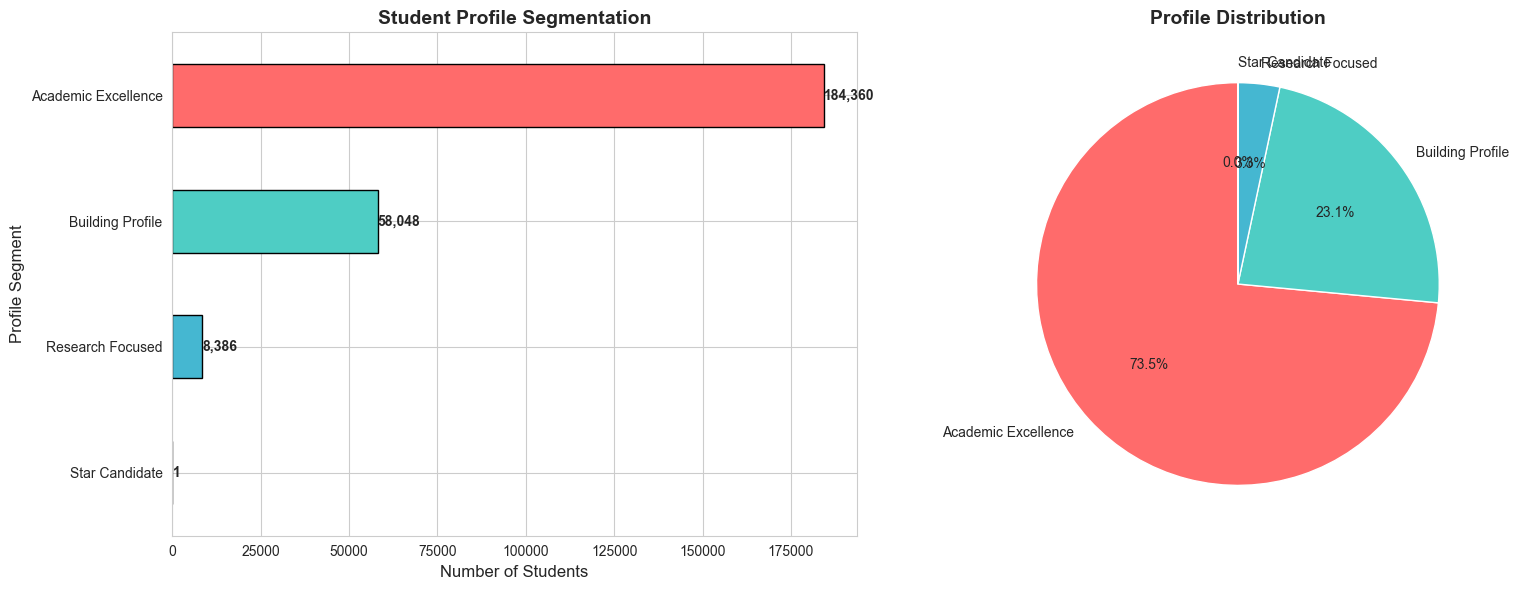


👥 Profile Segment Breakdown:

Academic Excellence:
   • Count: 184,360 students (73.5%)
   • Avg Experience: 0.0 months
   • Avg Academic Score: 0.45

Building Profile:
   • Count: 58,048 students (23.1%)
   • Avg Experience: -0.1 months
   • Avg Academic Score: -1.26

Research Focused:
   • Count: 8,386 students (3.3%)
   • Avg Experience: 0.4 months
   • Avg Academic Score: -1.14

Star Candidate:
   • Count: 1 students (0.0%)
   • Avg Experience: 105.7 months
   • Avg Academic Score: 0.91


💡 Profile Definitions:
   • Star Candidate: Top academics (75%+) AND extensive experience (75%+)
   • Academic Excellence: Top academics (75%+) with limited experience
   • Experience Rich: Strong experience (75%+) with moderate academics
   • Research Focused: Good academics (50%+) with publications
   • Well Rounded: Balanced academics (50%+) and experience (50%+)
   • Building Profile: Still developing competitive profile

💼 Strategic Insights:
   • Only 0.0% are 'Star Candidates' - extremely 

In [12]:
# Cell 8: Student Profile Segmentation

print("="*80)
print("👥 INSIGHT 7: STUDENT PROFILE SEGMENTATION")
print("="*80)

# Create profile strength segments based on multiple factors
if all(col in processed_df.columns for col in ['composite_academic_score', 'total_experience', 'has_publications']):
    
    # Define segments
    def categorize_profile(row):
        acad = row['composite_academic_score']
        exp = row['total_experience']
        pub = row.get('has_publications', 0)
        
        # Denormalize
        acad_percentile = (acad - processed_df['composite_academic_score'].min()) / (processed_df['composite_academic_score'].max() - processed_df['composite_academic_score'].min())
        exp_percentile = (exp - processed_df['total_experience'].min()) / (processed_df['total_experience'].max() - processed_df['total_experience'].min())
        
        if acad_percentile > 0.75 and exp_percentile > 0.75:
            return 'Star Candidate'
        elif acad_percentile > 0.75 and exp_percentile < 0.25:
            return 'Academic Excellence'
        elif acad_percentile < 0.25 and exp_percentile > 0.75:
            return 'Experience Rich'
        elif acad_percentile > 0.5 and pub > 0:
            return 'Research Focused'
        elif acad_percentile > 0.5 and exp_percentile > 0.5:
            return 'Well Rounded'
        else:
            return 'Building Profile'
    
    processed_df['profile_segment'] = processed_df.apply(categorize_profile, axis=1)
    
    segment_counts = processed_df['profile_segment'].value_counts()
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Horizontal bar chart
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
    segment_counts.plot(kind='barh', ax=axes[0], color=colors[:len(segment_counts)], edgecolor='black')
    axes[0].set_xlabel('Number of Students', fontsize=12)
    axes[0].set_ylabel('Profile Segment', fontsize=12)
    axes[0].set_title('Student Profile Segmentation', fontsize=14, fontweight='bold')
    axes[0].invert_yaxis()
    
    for i, v in enumerate(segment_counts.values):
        axes[0].text(v + 50, i, f'{v:,}', va='center', fontweight='bold')
    
    # Pie chart
    axes[1].pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%',
                colors=colors[:len(segment_counts)], startangle=90)
    axes[1].set_title('Profile Distribution', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n👥 Profile Segment Breakdown:")
    print("=" * 70)
    for segment, count in segment_counts.items():
        percentage = (count / len(processed_df)) * 100
        print(f"\n{segment}:")
        print(f"   • Count: {count:,} students ({percentage:.1f}%)")
        
        # Profile characteristics
        segment_data = processed_df[processed_df['profile_segment'] == segment]
        avg_acad = segment_data['composite_academic_score'].mean()
        
        if 'total_experience' in segment_data.columns:
            avg_exp = segment_data['total_experience'].mean()
            avg_exp_denorm = avg_exp * processed_df['total_experience'].std() + processed_df['total_experience'].mean()
            print(f"   • Avg Experience: {avg_exp_denorm:.1f} months")
        
        print(f"   • Avg Academic Score: {avg_acad:.2f}")
    
    print("\n" + "=" * 70)
    print("\n💡 Profile Definitions:")
    print("   • Star Candidate: Top academics (75%+) AND extensive experience (75%+)")
    print("   • Academic Excellence: Top academics (75%+) with limited experience")
    print("   • Experience Rich: Strong experience (75%+) with moderate academics")
    print("   • Research Focused: Good academics (50%+) with publications")
    print("   • Well Rounded: Balanced academics (50%+) and experience (50%+)")
    print("   • Building Profile: Still developing competitive profile")
    
    print("\n💼 Strategic Insights:")
    star_pct = (segment_counts.get('Star Candidate', 0) / len(processed_df)) * 100
    academic_pct = (segment_counts.get('Academic Excellence', 0) / len(processed_df)) * 100
    
    print(f"   • Only {star_pct:.1f}% are 'Star Candidates' - extremely competitive")
    print(f"   • {academic_pct:.1f}% rely primarily on academic strength")
    print("   • Multiple pathways exist - no single 'perfect' profile")

else:
    print("⚠️  Required columns for segmentation not available")

print("\n" + "="*80)

🔗 INSIGHT 8: FEATURE CORRELATIONS


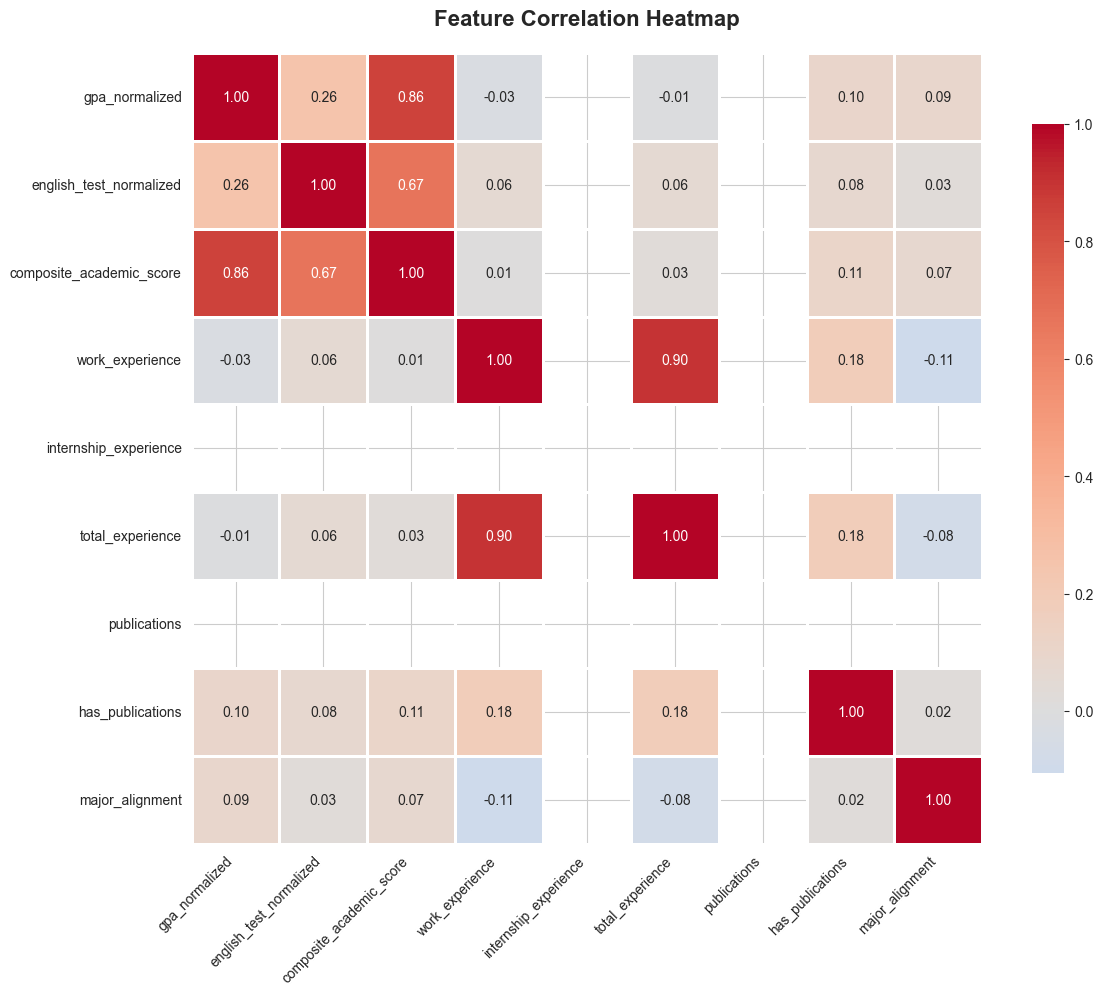


🔍 Strong Correlations (|r| > 0.5):
----------------------------------------------------------------------
   • work_experience ↔ total_experience
     Correlation: 0.899 (Strong positive)
   • gpa_normalized ↔ composite_academic_score
     Correlation: 0.856 (Strong positive)
   • english_test_normalized ↔ composite_academic_score
     Correlation: 0.671 (Moderate positive)

💡 Interpretation Guide:
   • r close to +1: Strong positive relationship (both increase together)
   • r close to -1: Strong negative relationship (one increases, other decreases)
   • r close to 0: No linear relationship
   • |r| > 0.7: Strong correlation
   • |r| 0.3-0.7: Moderate correlation
   • |r| < 0.3: Weak correlation



In [14]:
# Cell 9: Feature Correlation Analysis

print("="*80)
print("🔗 INSIGHT 8: FEATURE CORRELATIONS")
print("="*80)

# Select key numerical features
key_features = [
    'gpa_normalized', 'english_test_normalized', 'composite_academic_score',
    'work_experience', 'internship_experience', 'total_experience',
    'publications', 'has_publications', 'major_alignment'
]

# Filter available features
available_features = [f for f in key_features if f in processed_df.columns]

if len(available_features) >= 3:
    
    # Calculate correlation matrix
    corr_matrix = processed_df[available_features].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    print("\n🔍 Strong Correlations (|r| > 0.5):")
    print("-" * 70)
    
    # Find strong correlations
    strong_correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_correlations.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_val
                ))
    
    if strong_correlations:
        strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
        for feat1, feat2, corr in strong_correlations:
            direction = "positive" if corr > 0 else "negative"
            strength = "Strong" if abs(corr) > 0.7 else "Moderate"
            print(f"   • {feat1} ↔ {feat2}")
            print(f"     Correlation: {corr:.3f} ({strength} {direction})")
    else:
        print("   • No strong correlations found (good for avoiding multicollinearity)")
    
    print("\n💡 Interpretation Guide:")
    print("   • r close to +1: Strong positive relationship (both increase together)")
    print("   • r close to -1: Strong negative relationship (one increases, other decreases)")
    print("   • r close to 0: No linear relationship")
    print("   • |r| > 0.7: Strong correlation")
    print("   • |r| 0.3-0.7: Moderate correlation")
    print("   • |r| < 0.3: Weak correlation")

else:
    print("⚠️  Not enough numerical features for correlation analysis")

print("\n" + "="*80)

In [15]:
# Cell 10: Success Profile Analysis (if admission results available)

print("="*80)
print("🏆 INSIGHT 9: SUCCESS PROFILE ANALYSIS")
print("="*80)

# Check if we have admission results
result_col = None
if 'admission_result' in processed_df.columns:
    result_col = 'admission_result'
elif 'application_status' in processed_df.columns:
    result_col = 'application_status'

if result_col:
    
    # Identify accepted students (adjust based on your data)
    accepted_keywords = ['accept', 'admit', 'approved', 'yes', 'success']
    processed_df['is_accepted'] = processed_df[result_col].astype(str).str.lower().apply(
        lambda x: any(keyword in x for keyword in accepted_keywords)
    )
    
    acceptance_rate = processed_df['is_accepted'].mean() * 100
    
    print(f"\n📊 Overall Statistics:")
    print(f"   • Total Applications: {len(processed_df):,}")
    print(f"   • Accepted: {processed_df['is_accepted'].sum():,}")
    print(f"   • Acceptance Rate: {acceptance_rate:.1f}%")
    
    # Compare accepted vs rejected profiles
    if processed_df['is_accepted'].sum() > 0:
        
        accepted = processed_df[processed_df['is_accepted'] == True]
        rejected = processed_df[processed_df['is_accepted'] == False]
        
        # Academic comparison
        if 'composite_academic_score' in processed_df.columns:
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            
            # Academic scores
            axes[0, 0].hist([accepted['composite_academic_score'], rejected['composite_academic_score']], 
                           bins=30, label=['Accepted', 'Rejected'], color=['green', 'red'], alpha=0.6, edgecolor='black')
            axes[0, 0].set_xlabel('Composite Academic Score')
            axes[0, 0].set_ylabel('Frequency')
            axes[0, 0].set_title('Academic Score Distribution: Accepted vs Rejected')
            axes[0, 0].legend()
            
            # Experience comparison
            if 'total_experience' in processed_df.columns:
                exp_acc = accepted['total_experience'] * processed_df['total_experience'].std() + processed_df['total_experience'].mean()
                exp_rej = rejected['total_experience'] * processed_df['total_experience'].std() + processed_df['total_experience'].mean()
                
                axes[0, 1].hist([exp_acc, exp_rej], bins=30, 
                               label=['Accepted', 'Rejected'], color=['green', 'red'], alpha=0.6, edgecolor='black')
                axes[0, 1].set_xlabel('Total Experience (Months)')
                axes[0, 1].set_ylabel('Frequency')
                axes[0, 1].set_title('Experience Distribution: Accepted vs Rejected')
                axes[0, 1].legend()
            
            # GPA comparison
            if 'gpa_category' in processed_df.columns:
                gpa_comparison = pd.crosstab(processed_df['gpa_category'], 
                                            processed_df['is_accepted'], normalize='index') * 100
                gpa_comparison.plot(kind='bar', ax=axes[1, 0], color=['red', 'green'], edgecolor='black')
                axes[1, 0].set_xlabel('GPA Category')
                axes[1, 0].set_ylabel('Percentage')
                axes[1, 0].set_title('Acceptance Rate by GPA Category')
                axes[1, 0].legend(['Rejected', 'Accepted'])
                axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
            
            # Experience category comparison
            if 'experience_category' in processed_df.columns:
                exp_comparison = pd.crosstab(processed_df['experience_category'], 
                                            processed_df['is_accepted'], normalize='index') * 100
                exp_comparison.plot(kind='bar', ax=axes[1, 1], color=['red', 'green'], edgecolor='black')
                axes[1, 1].set_xlabel('Experience Category')
                axes[1, 1].set_ylabel('Percentage')
                axes[1, 1].set_title('Acceptance Rate by Experience Category')
                axes[1, 1].legend(['Rejected', 'Accepted'])
                axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
            
            plt.tight_layout()
            plt.show()
        
        print("\n📈 Accepted vs Rejected Profile Comparison:")
        print("=" * 70)
        
        comparison_features = ['composite_academic_score', 'total_experience', 'has_publications']
        available_comp = [f for f in comparison_features if f in processed_df.columns]
        
        for feature in available_comp:
            acc_mean = accepted[feature].mean()
            rej_mean = rejected[feature].mean()
            
            if feature == 'total_experience':
                acc_mean = acc_mean * processed_df['total_experience'].std() + processed_df['total_experience'].mean()
                rej_mean = rej_mean * processed_df['total_experience'].std() + processed_df['total_experience'].mean()
                print(f"\n{feature}:")
                print(f"   • Accepted Average: {acc_mean:.1f} months")
                print(f"   • Rejected Average: {rej_mean:.1f} months")
                print(f"   • Difference: {acc_mean - rej_mean:.1f} months")
            else:
                print(f"\n{feature}:")
                print(f"   • Accepted Average: {acc_mean:.3f}")
                print(f"   • Rejected Average: {rej_mean:.3f}")
                print(f"   • Difference: {acc_mean - rej_mean:.3f}")
        
        # GPA category acceptance rates
        if 'gpa_category' in processed_df.columns:
            print("\n\n🎯 Acceptance Rate by GPA Category:")
            print("-" * 50)
            gpa_acceptance = processed_df.groupby('gpa_category')['is_accepted'].agg(['sum', 'count', 'mean'])
            gpa_acceptance['acceptance_rate'] = gpa_acceptance['mean'] * 100
            
            for idx, row in gpa_acceptance.iterrows():
                print(f"   • {idx}: {row['acceptance_rate']:.1f}% ({int(row['sum'])}/{int(row['count'])})")
        
        # Experience category acceptance rates
        if 'experience_category' in processed_df.columns:
            print("\n\n💼 Acceptance Rate by Experience Category:")
            print("-" * 50)
            exp_acceptance = processed_df.groupby('experience_category')['is_accepted'].agg(['sum', 'count', 'mean'])
            exp_acceptance['acceptance_rate'] = exp_acceptance['mean'] * 100
            
            for idx, row in exp_acceptance.iterrows():
                print(f"   • {idx}: {row['acceptance_rate']:.1f}% ({int(row['sum'])}/{int(row['count'])})")
        
        print("\n\n💡 Key Success Factors:")
        
        # Identify strongest predictors
        if 'composite_academic_score' in processed_df.columns:
            acad_corr = processed_df['composite_academic_score'].corr(processed_df['is_accepted'])
            print(f"   • Academic strength correlation with admission: {acad_corr:.3f}")
        
        if 'total_experience' in processed_df.columns:
            exp_corr = processed_df['total_experience'].corr(processed_df['is_accepted'])
            print(f"   • Experience correlation with admission: {exp_corr:.3f}")
        
        if 'has_publications' in processed_df.columns:
            pub_acc_rate = accepted['has_publications'].mean() * 100
            pub_rej_rate = rejected['has_publications'].mean() * 100
            print(f"   • Publications: {pub_acc_rate:.1f}% of accepted vs {pub_rej_rate:.1f}% of rejected have publications")

else:
    print("\n⚠️  Admission results not available in dataset")
    print("   Analysis focuses on applicant profiles rather than success factors")

print("\n" + "="*80)

🏆 INSIGHT 9: SUCCESS PROFILE ANALYSIS

📊 Overall Statistics:
   • Total Applications: 250,795
   • Accepted: 0
   • Acceptance Rate: 0.0%



In [16]:
# Cell 11: Executive Summary Report

print("="*100)
print(" " * 35 + "📊 EXECUTIVE SUMMARY REPORT")
print("="*100)

print("\n" + "🎓 DATASET OVERVIEW ".center(100, "="))
print(f"\n{'Metric':<40} {'Value':<30}")
print("-" * 70)
print(f"{'Total Applications':<40} {len(processed_df):>10,}")
print(f"{'Total Features':<40} {processed_df.shape[1]:>10,}")
print(f"{'Data Completeness':<40} {(1 - processed_df.isnull().sum().sum()/(processed_df.shape[0]*processed_df.shape[1]))*100:>9.1f}%")

print("\n" + "📚 ACADEMIC PROFILE SUMMARY ".center(100, "="))
if 'gpa_normalized' in processed_df.columns:
    print(f"\nGPA Statistics:")
    print(f"{'  Average GPA':<40} {processed_df['gpa_normalized'].mean():>10.2f}/10")
    print(f"{'  Median GPA':<40} {processed_df['gpa_normalized'].median():>10.2f}/10")
    print(f"{'  Top 25% GPA threshold':<40} {processed_df['gpa_normalized'].quantile(0.75):>10.2f}/10")

if 'english_test_normalized' in processed_df.columns:
    print(f"\nEnglish Proficiency:")
    print(f"{'  Average Score':<40} {processed_df['english_test_normalized'].mean():>10.2f}")
    print(f"{'  Median Score':<40} {processed_df['english_test_normalized'].median():>10.2f}")

if 'gpa_category' in processed_df.columns:
    print(f"\nGPA Distribution:")
    for cat, count in processed_df['gpa_category'].value_counts().sort_index().items():
        pct = (count/len(processed_df))*100
        print(f"{'  ' + str(cat):<40} {count:>7,} ({pct:>5.1f}%)")

print("\n" + "💼 EXPERIENCE PROFILE SUMMARY ".center(100, "="))
if 'total_experience' in processed_df.columns:
    exp_denorm = processed_df['total_experience'] * processed_df['total_experience'].std() + processed_df['total_experience'].mean()
    print(f"\nExperience Statistics:")
    print(f"{'  Average Total Experience':<40} {exp_denorm.mean():>8.1f} months ({exp_denorm.mean()/12:.1f} years)")
    print(f"{'  Median Experience':<40} {exp_denorm.median():>8.1f} months")
    print(f"{'  Students with 0 experience':<40} {(exp_denorm == 0).sum():>7,} ({(exp_denorm == 0).sum()/len(processed_df)*100:>5.1f}%)")
    print(f"{'  Students with 2+ years':<40} {(exp_denorm >= 24).sum():>7,} ({(exp_denorm >= 24).sum()/len(processed_df)*100:>5.1f}%)")

if 'has_publications' in processed_df.columns:
    pub_count = processed_df['has_publications'].sum()
    print(f"\nResearch Profile:")
    print(f"{'  Students with publications':<40} {pub_count:>7,} ({pub_count/len(processed_df)*100:>5.1f}%)")

print("\n" + "🎯 TOP PREFERENCES ".center(100, "="))

if 'university_name' in processed_df.columns:
    print(f"\nTop 5 Universities:")
    for i, (uni, count) in enumerate(processed_df['university_name'].value_counts().head(5).items(), 1):
        print(f"  {i}. {uni:<50} {count:>6,} applications")

if 'categorical_course_name' in processed_df.columns or 'course_name' in processed_df.columns:
    course_col = 'categorical_course_name' if 'categorical_course_name' in processed_df.columns else 'course_name'
    print(f"\nTop 5 Programs:")
    for i, (prog, count) in enumerate(processed_df[course_col].value_counts().head(5).items(), 1):
        print(f"  {i}. {prog:<50} {count:>6,} applications")

if 'application_term' in processed_df.columns:
    print(f"\nApplication Term:")
    for term, count in processed_df['application_term'].value_counts().items():
        print(f"{'  ' + term.upper():<40} {count:>7,} ({count/len(processed_df)*100:>5.1f}%)")

print("\n" + "💡 KEY INSIGHTS ".center(100, "="))

insights = []

# Academic insight
if 'gpa_category' in processed_df.columns:
    high_gpa_pct = ((processed_df['gpa_category'].isin(['High', 'Very High'])).sum() / len(processed_df)) * 100
    insights.append(f"• {high_gpa_pct:.1f}% of applicants have High/Very High GPA - highly competitive pool")

# Experience insight
if 'total_experience' in processed_df.columns:
    exp_denorm = processed_df['total_experience'] * processed_df['total_experience'].std() + processed_df['total_experience'].mean()
    avg_exp_years = exp_denorm.mean() / 12
    if avg_exp_years < 1:
        insights.append(f"• Majority are fresh graduates (avg {avg_exp_years:.1f} years experience)")
    else:
        insights.append(f"• Mixed pool of fresh graduates and professionals (avg {avg_exp_years:.1f} years experience)")

# University tier insight
if 'university_tier' in processed_df.columns:
    top_tier_pct = (processed_df['university_tier'] == 'Top_50').sum() / len(processed_df) * 100
    if top_tier_pct > 50:
        insights.append(f"• {top_tier_pct:.1f}% target Top 50 universities - highly ambitious applicant pool")

# Publication insight
if 'has_publications' in processed_df.columns:
    pub_pct = (processed_df['has_publications'].sum() / len(processed_df)) * 100
    if pub_pct < 20:
        insights.append(f"• Only {pub_pct:.1f}% have research publications - publications are a differentiator")

# Profile diversity
if 'profile_segment' in processed_df.columns:
    star_pct = (processed_df['profile_segment'] == 'Star Candidate').sum() / len(processed_df) * 100
    insights.append(f"• Only {star_pct:.1f}% are 'Star Candidates' - multiple pathways to admission exist")

# Correlation insight
if 'composite_academic_score' in processed_df.columns and 'total_experience' in processed_df.columns:
    corr = processed_df['composite_academic_score'].corr(processed_df['total_experience'])
    if abs(corr) < 0.3:
        insights.append("• Weak correlation between academics and experience - can compensate one with the other")

print()
for insight in insights:
    print(f"\n{insight}")

print("\n\n" + "🎯 ACTIONABLE RECOMMENDATIONS ".center(100, "="))

recommendations = [
    "\n1. FOR APPLICANTS:",
    "   • Focus on composite profile strength, not just single metrics",
    "   • Publications can be a significant differentiator in competitive pools",
    "   • Multiple pathways exist - play to your strengths (academics vs experience)",
    
    "\n2. FOR PROFILE IMPROVEMENT:",
    "   • Target GPA above 7.5/10 for competitive programs",
    "   • Gain relevant experience through internships if work experience is limited",
    "   • Consider research projects or publications for research-focused programs",
    
    "\n3. FOR APPLICATION STRATEGY:",
    "   • Apply to a mix of university tiers (reach, target, safety)",
    "   • Consider Fall term for more opportunities (if data shows)",
    "   • Highlight unique combinations of strengths in your profile"
]

for rec in recommendations:
    print(rec)

print("\n" + "="*100)
print(" " * 30 + "📊 END OF ANALYSIS REPORT")
print("="*100)

                                   📊 EXECUTIVE SUMMARY REPORT

========================================🎓 DATASET OVERVIEW =========================================

Metric                                   Value                         
----------------------------------------------------------------------
Total Applications                          250,795
Total Features                                   95
Data Completeness                             96.4%

====================================📚 ACADEMIC PROFILE SUMMARY =====================================

GPA Statistics:
  Average GPA                                  0.00/10
  Median GPA                                   0.11/10
  Top 25% GPA threshold                        0.74/10

English Proficiency:
  Average Score                               -0.00
  Median Score                                 0.14

GPA Distribution:
  High                                    99,449 ( 39.7%)
  Low                                      7,581 